In [1]:
# https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.8.0


In [2]:
dataset_path = keras.utils.get_file("car.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
dataset_path

65536/51867 [=====================================] - 0s 3us/step


'/home/fred/.keras/datasets/car.data'

In [3]:
dataframe = pd.read_csv(dataset_path, header=None, names=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output'])
dataset = dataframe.values

In [4]:
dataframe

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
# split into input (X) and output (Y) variables
X = dataframe.drop(['output'], axis=1).values
y = dataframe['output'].values

In [8]:
from sklearn.preprocessing import LabelEncoder
#encode class values as integers
encoder = LabelEncoder()
encoder.fit(X)
encoder.transform(X)

ValueError: y should be a 1d array, got an array of shape (1728, 6) instead.

In [7]:
from sklearn.preprocessing import LabelEncoder
#encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [23]:
X_train.shape

(187, 60)

In [24]:
y_train.shape

(187,)

In [25]:
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_dim=60),
])


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
6/6 [==============================] - 0s 628us/step - loss: 0.6880 - accuracy: 0.5348
Epoch 2/10
6/6 [==============================] - 0s 610us/step - loss: 0.6875 - accuracy: 0.5348
Epoch 3/10
6/6 [==============================] - 0s 606us/step - loss: 0.6860 - accuracy: 0.5348
Epoch 4/10
6/6 [==============================] - 0s 633us/step - loss: 0.6850 - accuracy: 0.5241
Epoch 5/10
6/6 [==============================] - 0s 675us/step - loss: 0.6841 - accuracy: 0.5294
Epoch 6/10
6/6 [==============================] - 0s 825us/step - loss: 0.6841 - accuracy: 0.5348
Epoch 7/10
6/6 [==============================] - 0s 731us/step - loss: 0.6828 - accuracy: 0.5294
Epoch 8/10
6/6 [==============================] - 0s 557us/step - loss: 0.6822 - accuracy: 0.5348
Epoch 9/10
6/6 [==============================] - 0s 621us/step - loss: 0.6815 - accuracy: 0.5401
Epoch 10/10
6/6 [==============================] - 0s 654us/step - loss: 0.6807 - accuracy: 0.5615


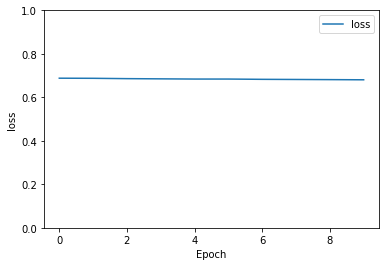

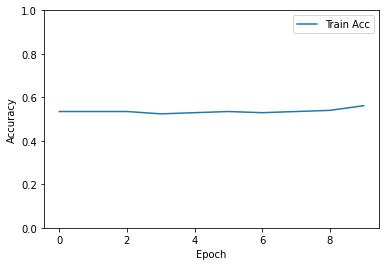

In [29]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


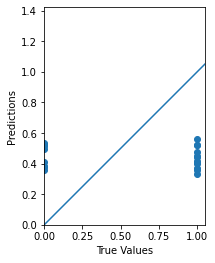

In [30]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
